# Análise Estátistica de Dados

## Bibliotecas
Como este é um projeto de teste inicial no GitHub, o objetivo é fazer uma análise do conjunto de dados e das características, portanto, apenas as bibliotecas necessárias serão implementadas.

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Processamento básico de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Dataset

In [3]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")

# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

# Exibindo o DataFrame
df.head()


O dataset possui 6704 registros e 6 atributos.


Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

In [51]:
#Vendo as colunas
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [4]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
#Verificando duplicatas
df.duplicated().sum()

4912

In [43]:
# Criando um DataFrame com as colunas de flag de duplicatas
df_duplicate = df.copy()
df_duplicate['flag_duplicated'] = df.duplicated()

# Contagem de duplicatas por linha
count_df = df_duplicate.groupby(list(df_duplicate.columns)).size().reset_index(name='count')

# Filtrando apenas as linhas com contagem maior que 1
filtered_count_df = count_df[count_df['count'] > 1]

# Ordenando as linhas pelo valor da contagem
sorted_count_df = filtered_count_df.sort_values(by='count', ascending=False).reset_index(drop=True)

sorted_count_df.head(15)

Age  Gender    Education Level          Job Title  Years of Experience  \
0    24  Female        High School       Receptionist                    0   
1    32    Male  Bachelor's Degree    Product Manager                    7   
2    27    Male  Bachelor's Degree  Software Engineer                    3   
3    32    Male         Bachelor's  Software Engineer                    8   
4    33  Female           Master's    Product Manager                   11   
5    29  Female           Master's     Data Scientist                    6   
6    27    Male         Bachelor's  Software Engineer                    4   
7    25    Male  Bachelor's Degree    Product Manager                    1   
8    26    Male         Bachelor's       Data Analyst                    3   
9    30  Female                PhD     Data Scientist                    7   
10   31  Female                PhD     Data Scientist                    8   
11   29    Male  Bachelor's Degree  Marketing Analyst                    4   
12   24    Male         Bachelor's       Data Analyst                    1   
13   28  Female         Bachelor's  Software Engineer                    5   
14   28  Female  Bachelor's Degree  Marketing Analyst                    3   

    Salary  flag_duplicated  count  
0    25000             True     44  
1   120000             True     44  
2    80000             True     44  
3   190000             True     38  
4   198000             True     37  
5   180000             True     36  
6   140000             True     36  
7    60000             True     35  
8   130000             True     34  
9   185000             True     32  
10  140000             True     32  
11   70000             True     32  
12   90000             True     31  
13  160000             True     30  
14   60000             True     29

In [40]:
#Verificando se a nulos
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
round((df.isnull().sum()/df.shape[0])*100,3)

Age                    0.030
Gender                 0.030
Education Level        0.045
Job Title              0.030
Years of Experience    0.045
Salary                 0.075
dtype: float64

In [8]:
df[df["Salary"].isna()]

Age  Gender    Education Level            Job Title  \
172    NaN     NaN                NaN                  NaN   
260    NaN     NaN                NaN                  NaN   
3136  31.0    Male    Master's Degree  Full Stack Engineer   
5247  26.0  Female  Bachelor's Degree             Social M   
6455  36.0    Male  Bachelor's Degree       Sales Director   

      Years of Experience  Salary  
172                   NaN     NaN  
260                   NaN     NaN  
3136                  8.0     NaN  
5247                  NaN     NaN  
6455                  6.0     NaN

In [9]:
# Como há poucos nulos, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [52]:
# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 6698 registros e 6 atributos.


In [10]:
#Extraindo estatiticas
df.describe().T

count           mean           std    min      25%  \
Age                  6698.0      33.623022      7.615784   21.0     28.0   
Years of Experience  6698.0       8.095178      6.060291    0.0      3.0   
Salary               6698.0  115329.253061  52789.792507  350.0  70000.0   

                          50%       75%       max  
Age                      32.0      38.0      62.0  
Years of Experience       7.0      12.0      34.0  
Salary               115000.0  160000.0  250000.0

In [11]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
dtype: int64

In [12]:
# Selecionando apenas as colunas numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Percorrendo cada coluna numérica do DataFrame
for col in numeric_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')


Coluna: Age
27.0    516
30.0    449
29.0    444
28.0    429
33.0    398
Name: Age, dtype: int64


Coluna: Years of Experience
2.0    610
3.0    602
1.0    540
4.0    522
6.0    438
Name: Years of Experience, dtype: int64


Coluna: Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
60000.0     231
Name: Salary, dtype: int64




In [13]:
#Transformando os numerais em inteiros
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)

#Verificando se a conversão foi realizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6698 non-null   int32 
 1   Gender               6698 non-null   object
 2   Education Level      6698 non-null   object
 3   Job Title            6698 non-null   object
 4   Years of Experience  6698 non-null   int32 
 5   Salary               6698 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 287.8+ KB


In [14]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=[np.object]).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')

    

Coluna: Gender
Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Name: Education Level, dtype: int64


Coluna: Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Name: Job Title, dtype: int64




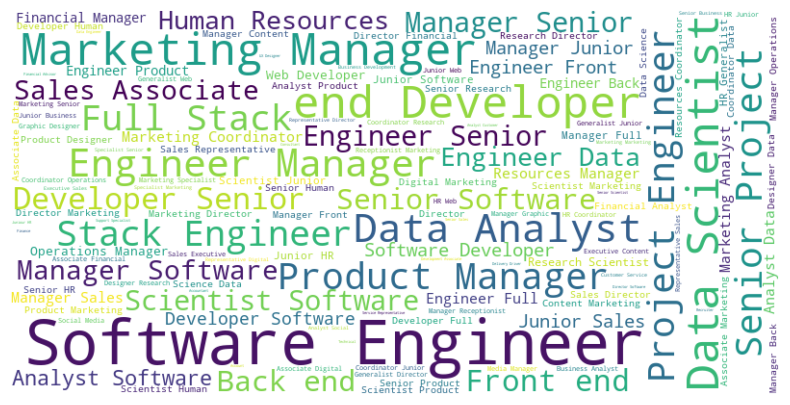

In [49]:

# Combine todo o texto da coluna 'text_column'
all_text = ' '.join(df['Job Title'])

# Crie um objeto WordCloud com alinhamento horizontal
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
df_describe.loc['skewness'] = df.skew()

# Calculando o IQR para cada coluna numérica
df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

count       mean       std    min      25%       50%  \
Age                  6698.0      33.62      7.62   21.0     28.0      32.0   
Years of Experience  6698.0       8.09      6.06    0.0      3.0       7.0   
Salary               6698.0  115329.25  52789.79  350.0  70000.0  115000.0   

                          75%       max       amp     cv  skewness      IQR  
Age                      38.0      62.0      41.0  22.65      0.91     10.0  
Years of Experience      12.0      34.0      34.0  74.89      0.98      9.0  
Salary               160000.0  250000.0  249650.0  45.77      0.06  90000.0

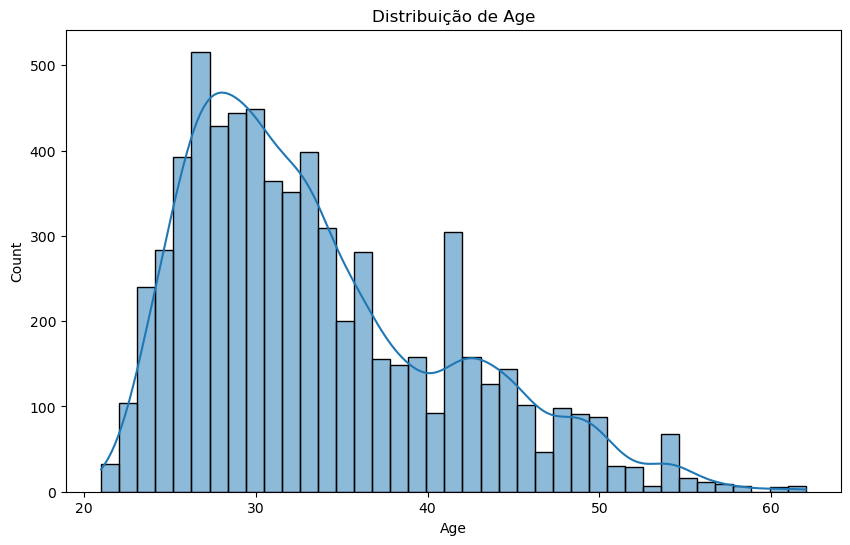

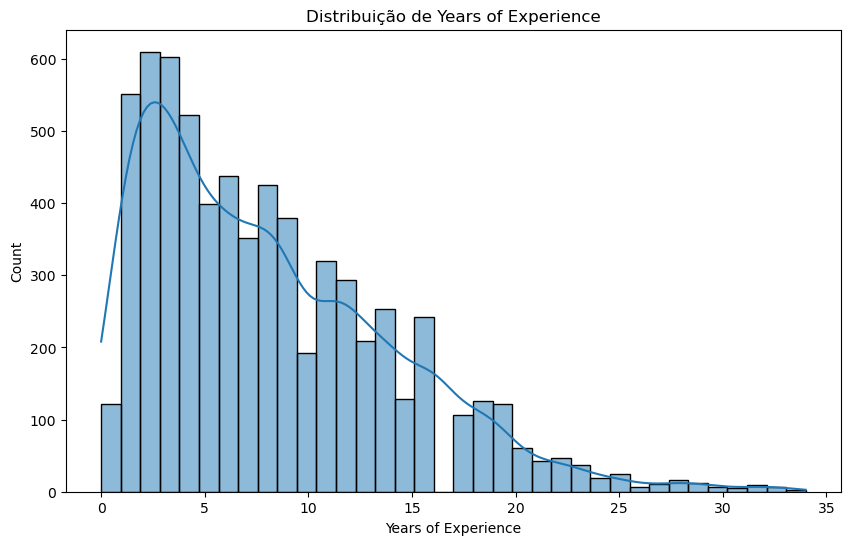

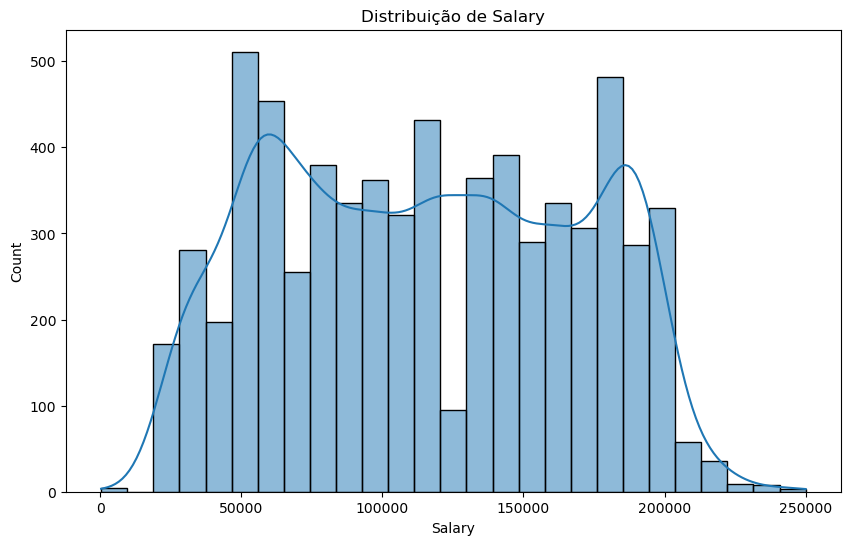

In [16]:
# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()


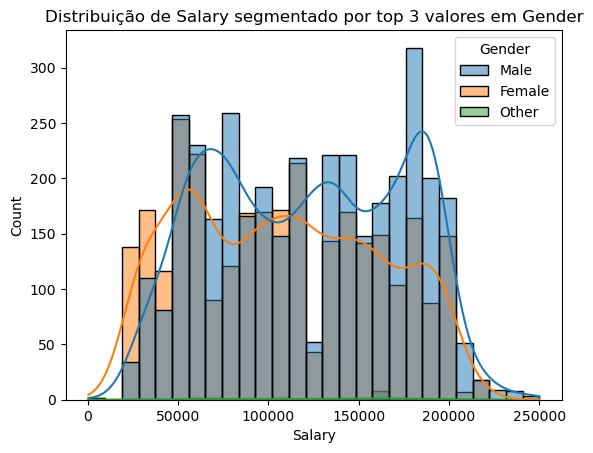

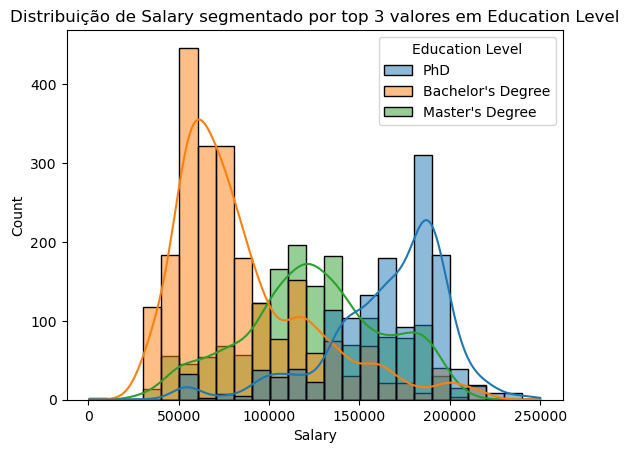

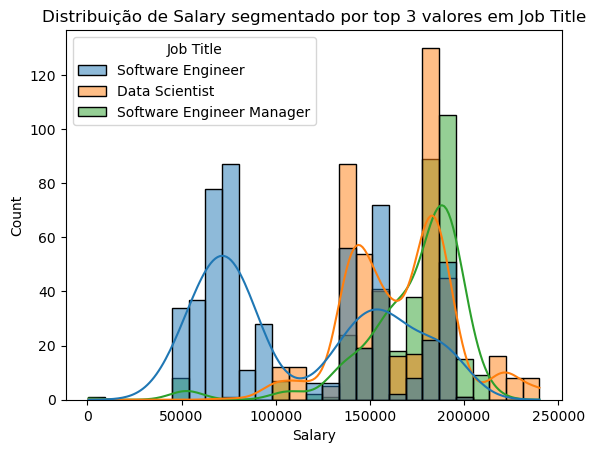

In [17]:
for col in text_columns:
    # Selecionando os top 3 valores
    top_3_values = df[col].value_counts().index[:3]

    # Filtrando o DataFrame original para incluir apenas as linhas que correspondem aos 3 principais valores
    df_top_3 = df[df[col].isin(top_3_values)]

    # Criando o gráfico de densidade de kernel
    sns.histplot(data=df_top_3, x="Salary", hue=col, kde=True)
    plt.title(f'Distribuição de Salary segmentado por top 3 valores em {col}')
    plt.show()




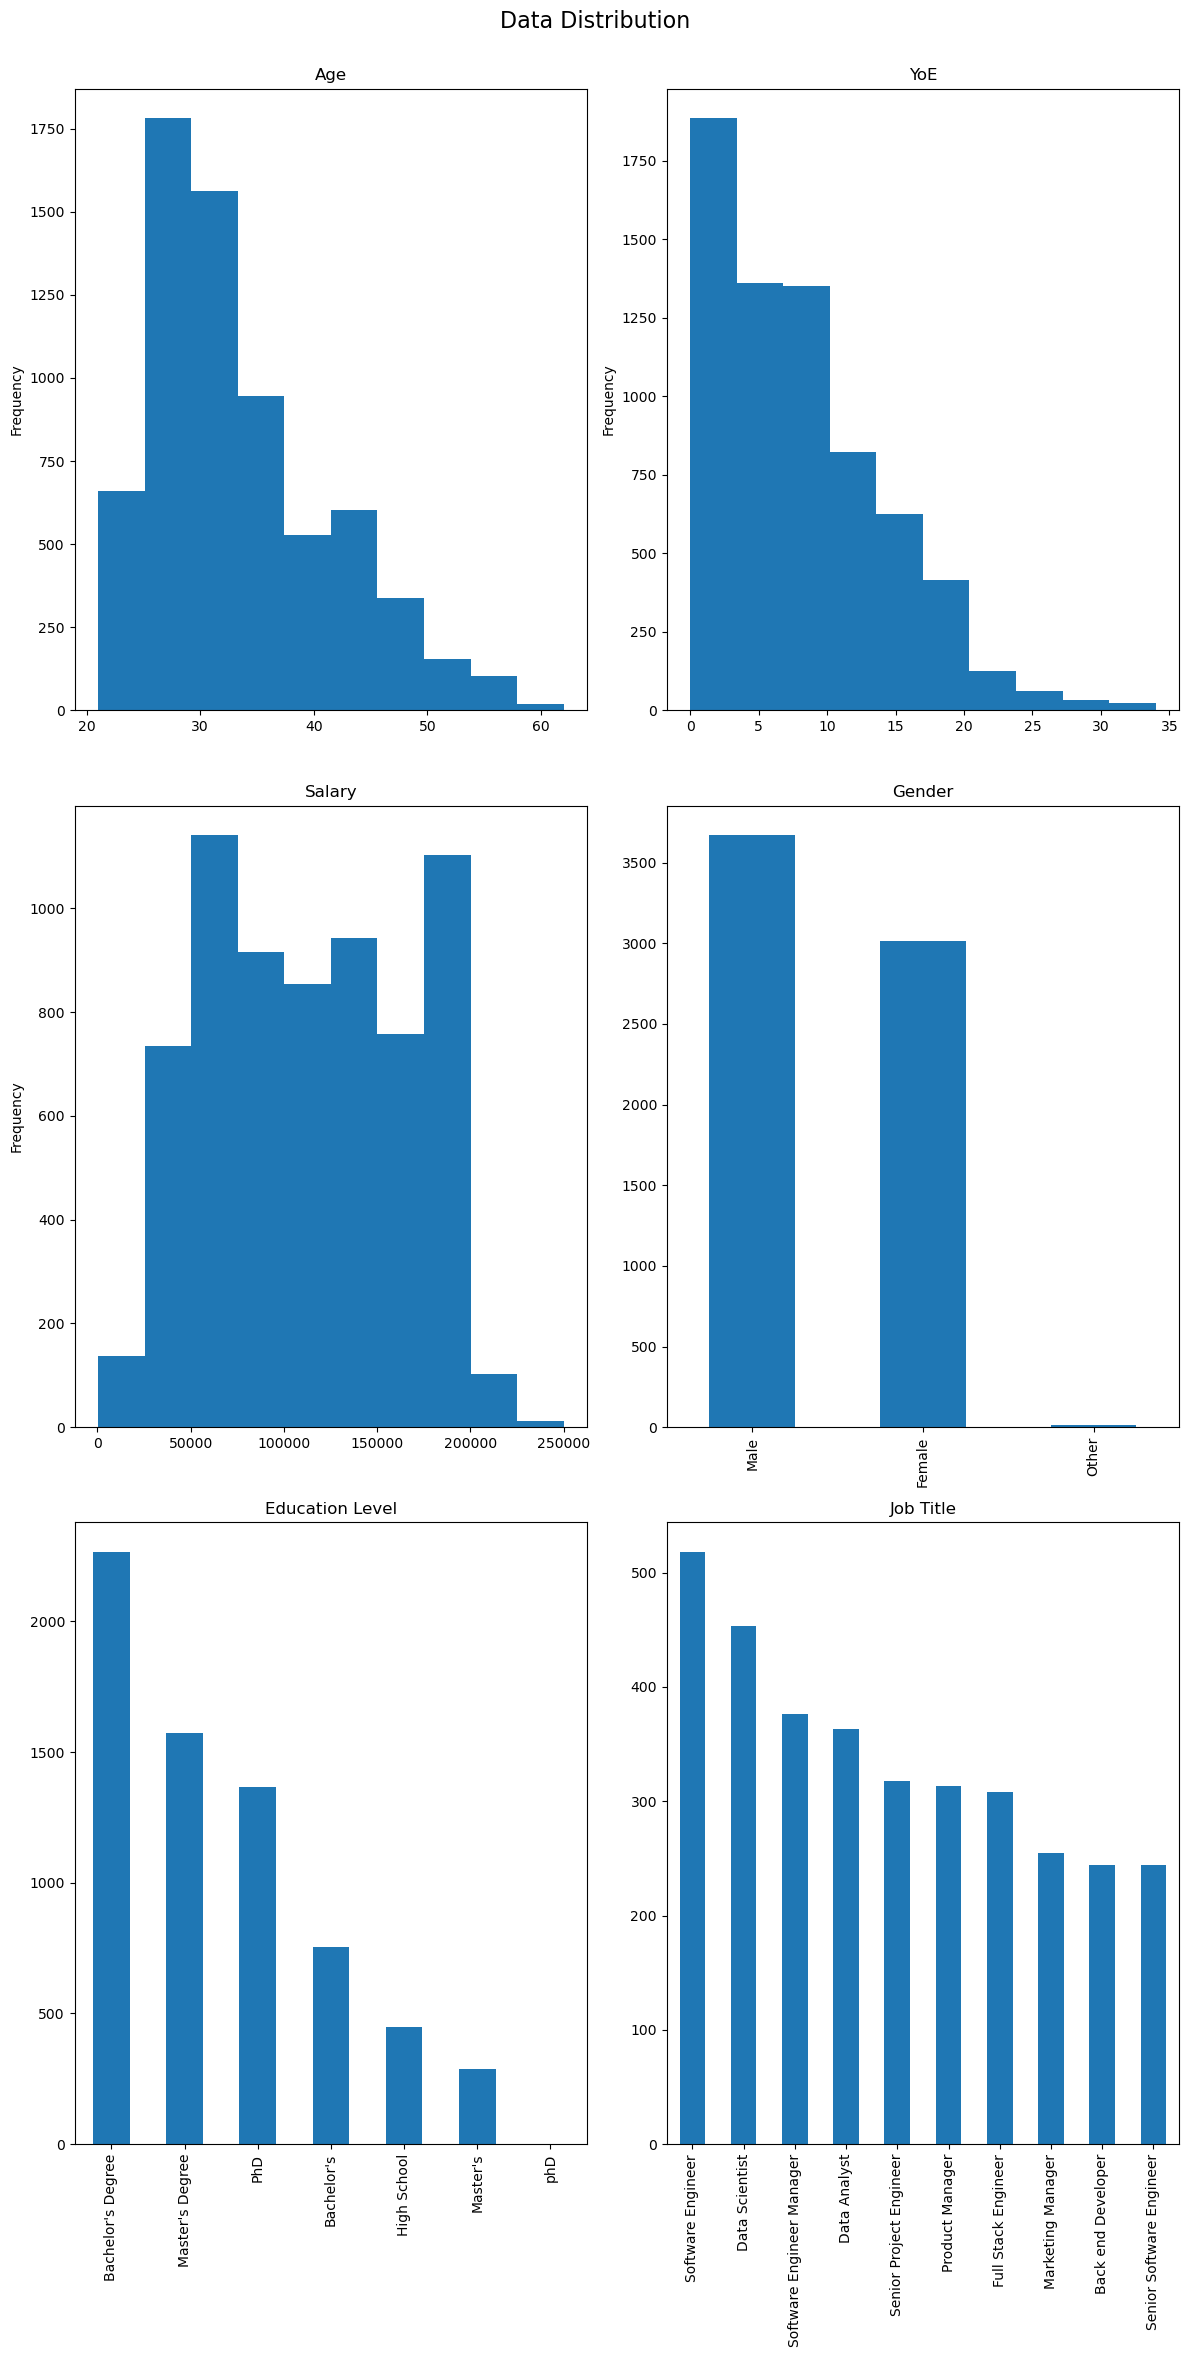

In [53]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,24))

df['Age'].plot(kind='hist', ax=axes[0,0], title='Age')
df['Years of Experience'].plot(kind='hist', ax=axes[0,1], title='YoE')
df['Salary'].plot(kind='hist', ax=axes[1,0], title='Salary')
df['Gender'].value_counts().plot(kind='bar', ax=axes[1,1], title='Gender')
df['Education Level'].value_counts().plot(kind='bar', ax=axes[2,0], title='Education Level')
df['Job Title'].value_counts()[:10].plot(kind='bar', ax=axes[2,1], title='Job Title')

fig.suptitle('Data Distribution\n\n', fontsize=16)
plt.tight_layout()

In [54]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Gender','<b>Education Level','<b>Age', '<b>Years of Experience'))

fig.add_trace(go.Box(x=df['Gender'], y=df['Salary']), row=1, col=1).update_yaxes(title_text='<b>Salary'),
fig.add_trace(go.Box(x=df['Education Level'], y=df['Salary']), row=1, col=2)
fig.add_trace(go.Box(x=df['Age'], y=df['Salary']), row=2, col=1)
fig.add_trace(go.Box(x=df['Years of Experience'], y=df['Salary']), row=2, col=2)

fig.update_layout(title='<b>Data Distribution respect Salary', height=800, width=800,
                 showlegend=False,
                 title_font_size = 20)
fig.show()

In [55]:
fig = px.histogram(df, x='Age', title='Histograma de Edades')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Age',
             title='<b>Age Frequency',
             title_font_size = 20,
                          )

fig.show()

In [56]:
fig = px.histogram(df, x='Years of Experience', 
                   title='Histograma de Edades', 
                   
  )

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Years of Experience Frequency',
             title_font_size = 20,
    
             )


fig.show()

In [57]:
fig = px.histogram(df, x='Salary')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Salary') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Salary Frequency',
             title_font_size = 20,
    
             )


fig.show()

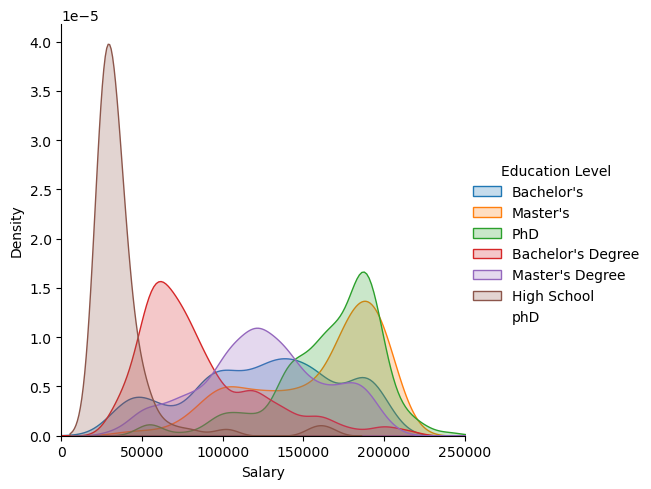

In [59]:
(sns.FacetGrid(df, hue="Education Level", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);

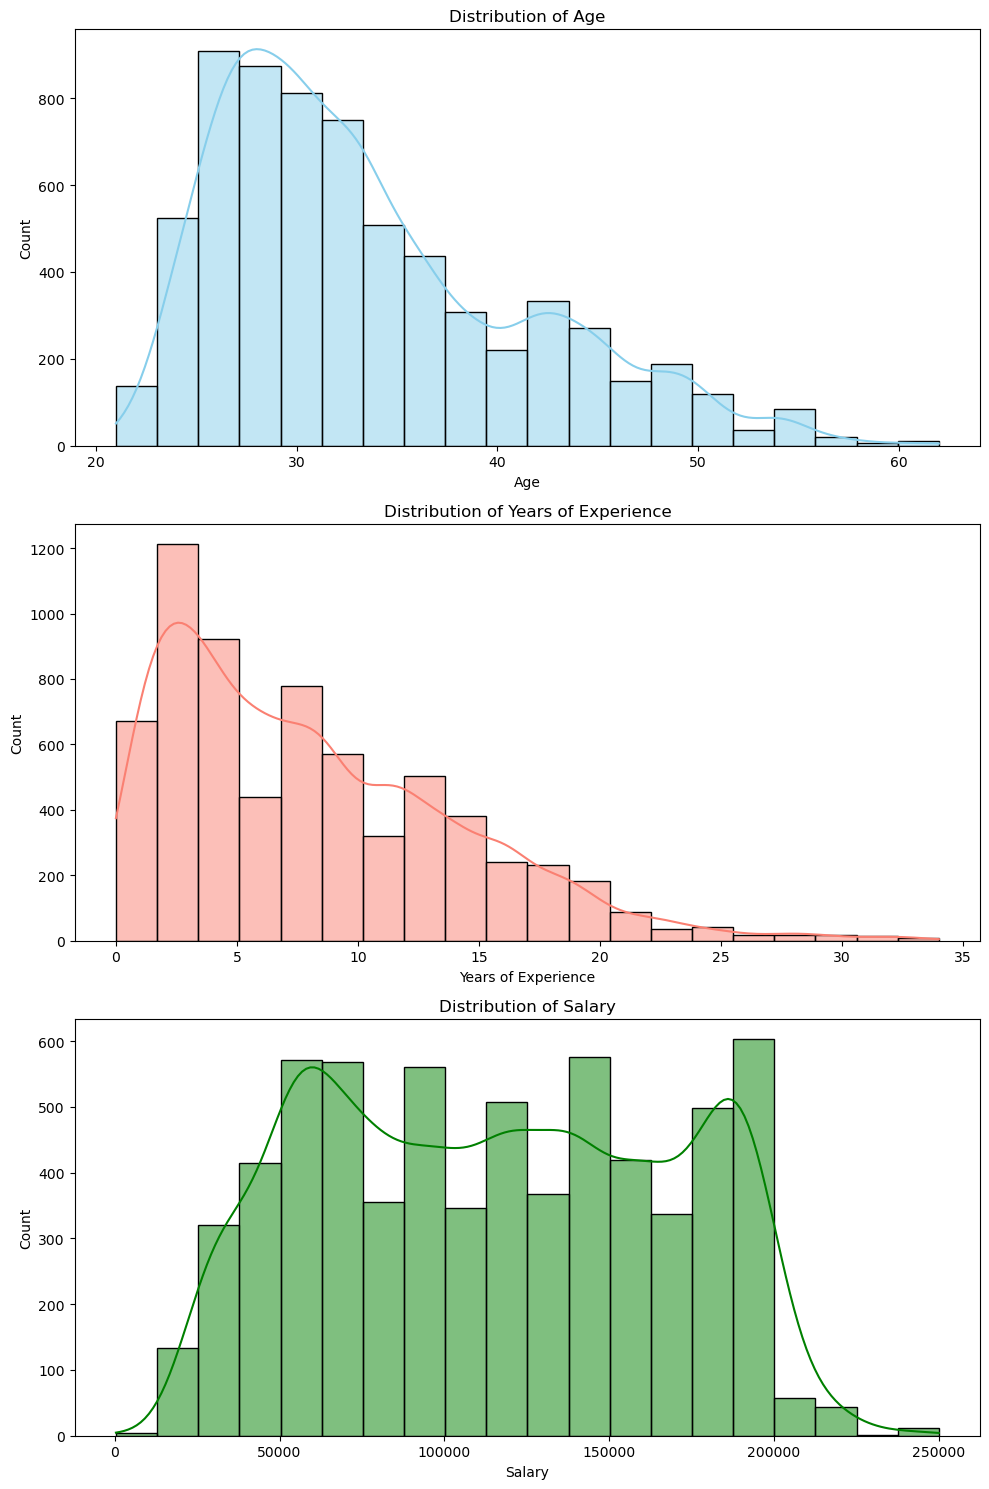

In [62]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histograms for Age, Years of Experience, and Salary
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

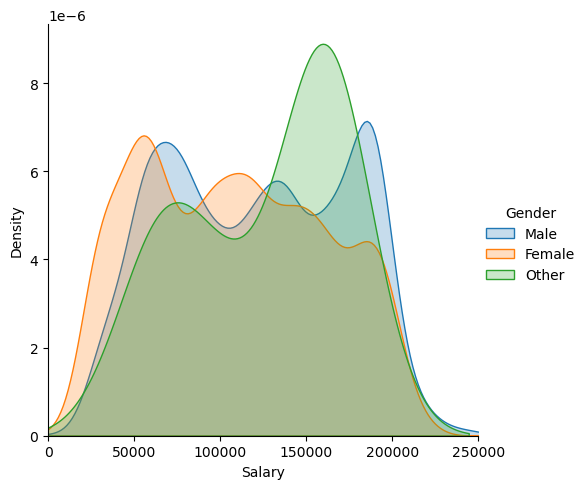

In [60]:
(sns.FacetGrid(df, hue="Gender", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);

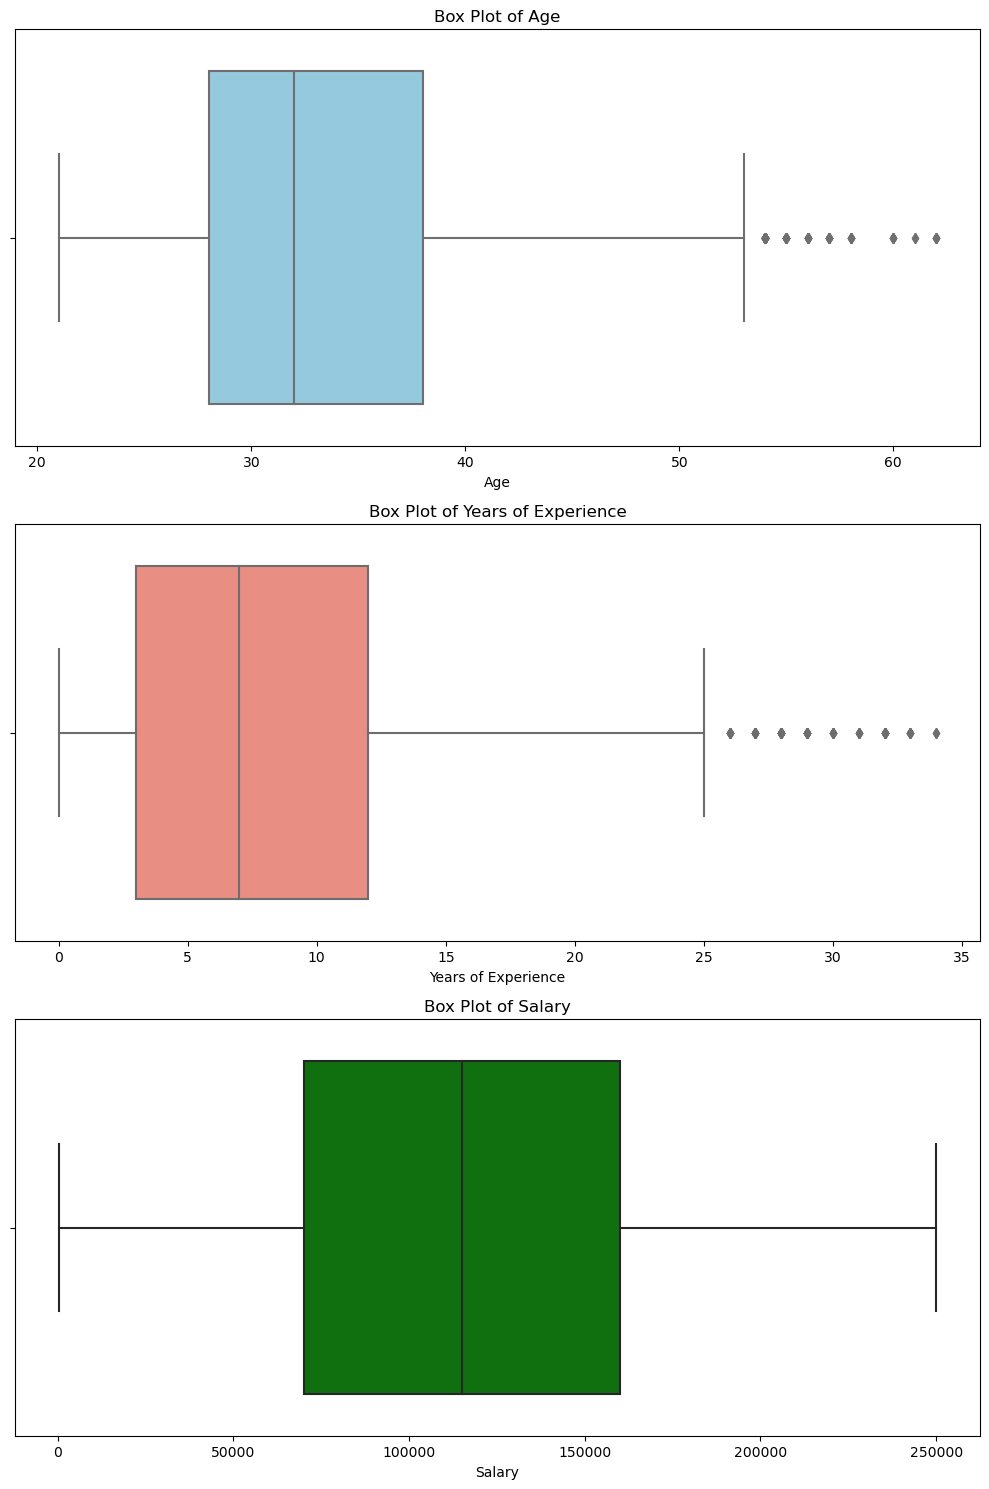

In [64]:
# Box plots for Age, Years of Experience, and Salary
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

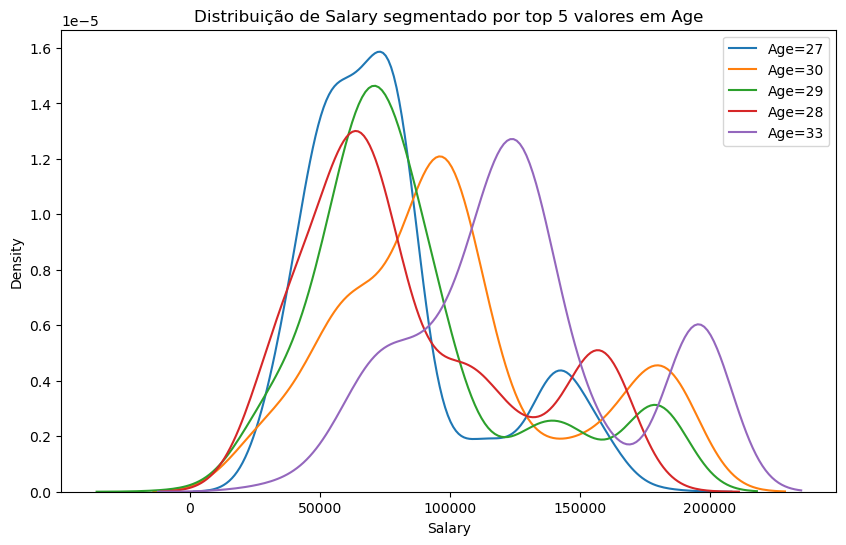

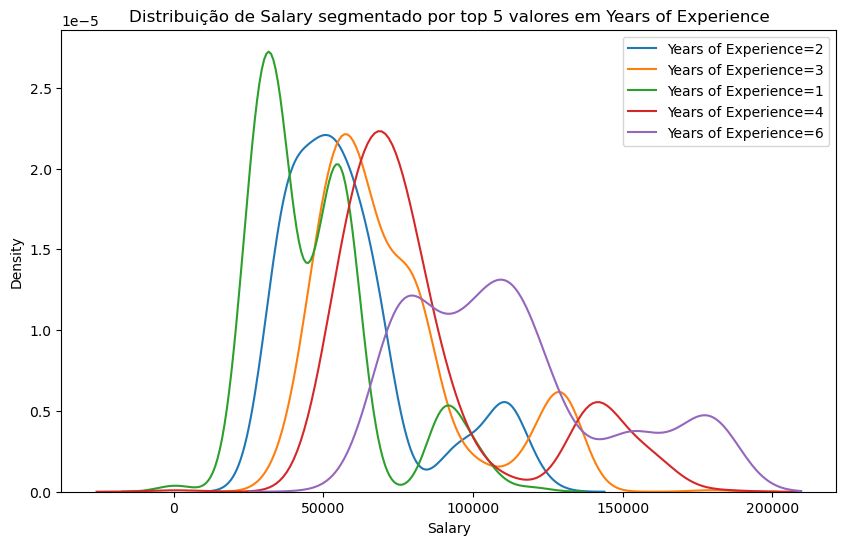

In [18]:
# Selecionando apenas as colunas numéricas, excluindo a coluna 'Salary'
numeric_columns_salary = df.select_dtypes(include=[np.number]).columns.drop('Salary')

for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_5_values = df[col].value_counts().index[:5]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_5 = df[df[col].isin(top_5_values)]

    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    for value in top_5_values:
        sns.kdeplot(data=df_top_5[df_top_5[col] == value], x='Salary', label=f'{col}={value}')
    plt.title(f'Distribuição de Salary segmentado por top 5 valores em {col}')
    plt.legend()
    plt.show()



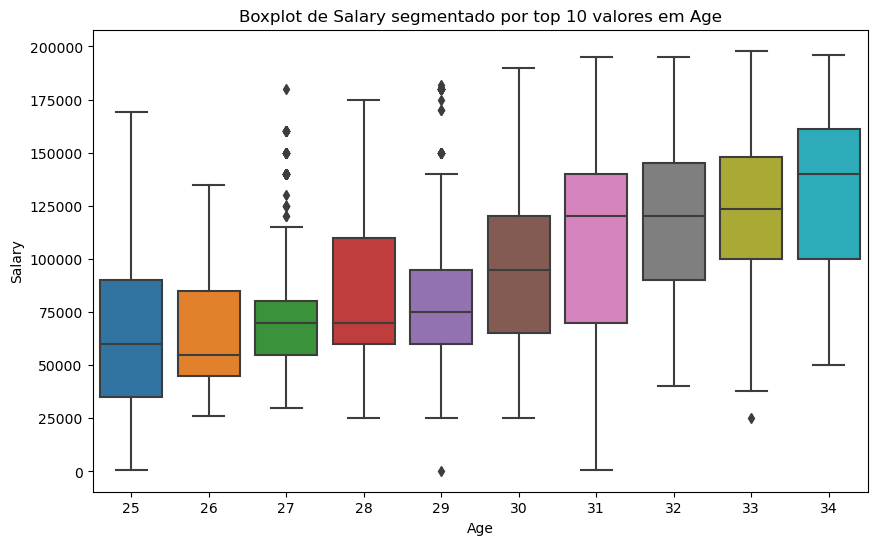

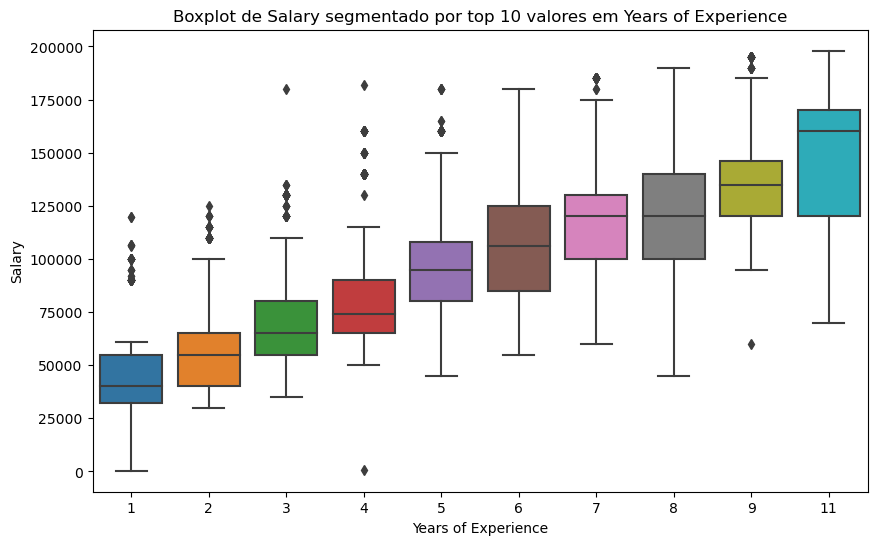

In [19]:
for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_10_values = df[col].value_counts().index[:10]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_10 = df[df[col].isin(top_10_values)]

    # Criando o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Salary', data=df_top_10)
    plt.title(f'Boxplot de Salary segmentado por top 10 valores em {col}')
    plt.show()



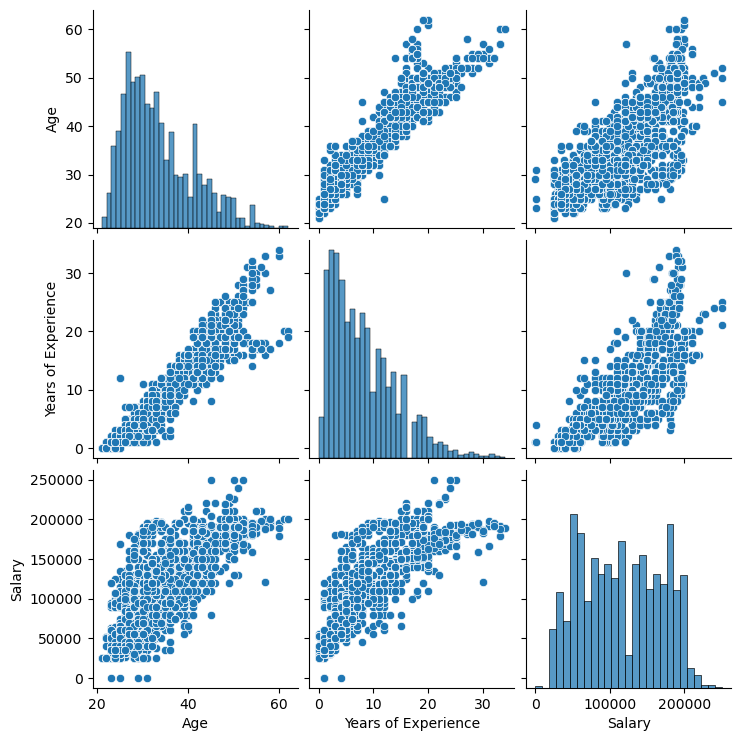

In [20]:
sns.pairplot(df);

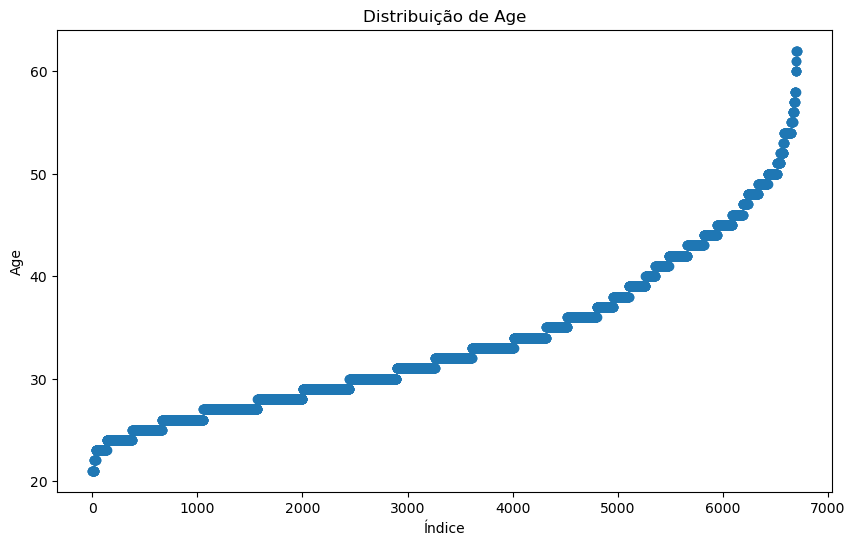

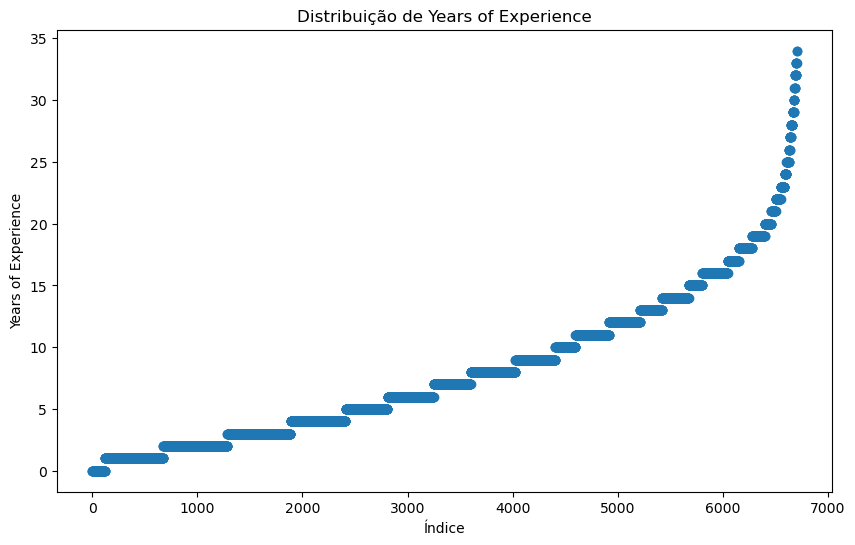

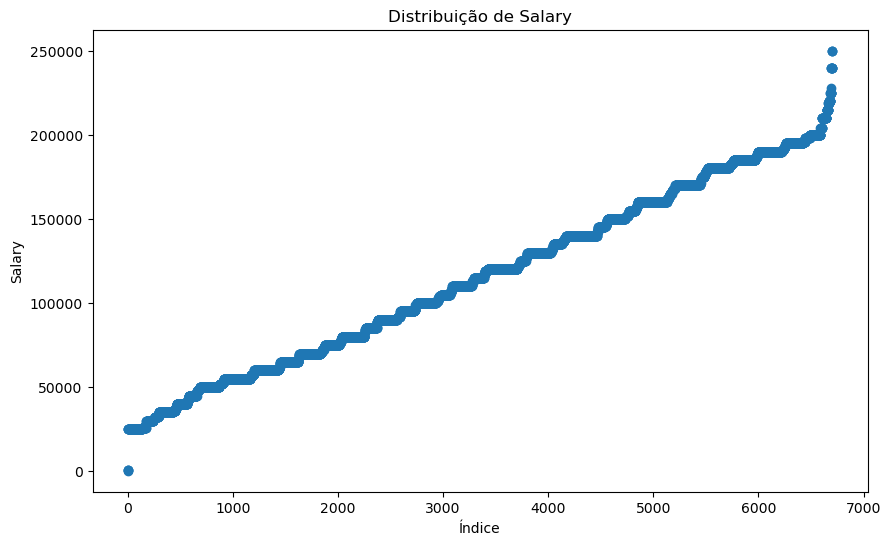

In [21]:
# Identificar colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Ordenar cada coluna
df_sorted = df[numeric_cols].apply(lambda x: x.sort_values().values)

# Criação do gráfico de dispersão
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sorted.index, df_sorted[col])
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Índice')  # Rótulo do eixo x
    plt.ylabel(col)  # Rótulo do eixo y
    plt.show()


In [22]:
for col in numeric_cols:
    fig = px.box(df, y=col)
    fig.update_layout(title_text=f'Boxplot de {col}')
    fig.show()

<AxesSubplot:>

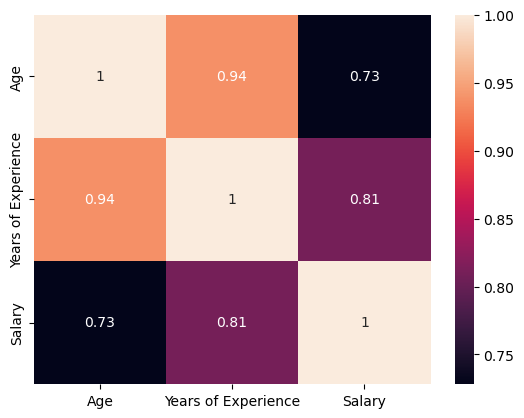

In [23]:
sns.heatmap(df.corr(), annot=True)